In [1]:
#import the all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file/read the dateset
df = pd.read_csv('50_Startups.csv')

In [3]:
#see the first 5 records in dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#see the last 5 records in dataset
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
#see the column names in dataset
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
#see the size of dataset
df.shape

(50, 5)

In [7]:
#see the information our dataset
#info() returns the no of colums,datatype of coluns,is there null value present in dataset it also show,no of records in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
#to see the column wise no of null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
#to see correlation between the features
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

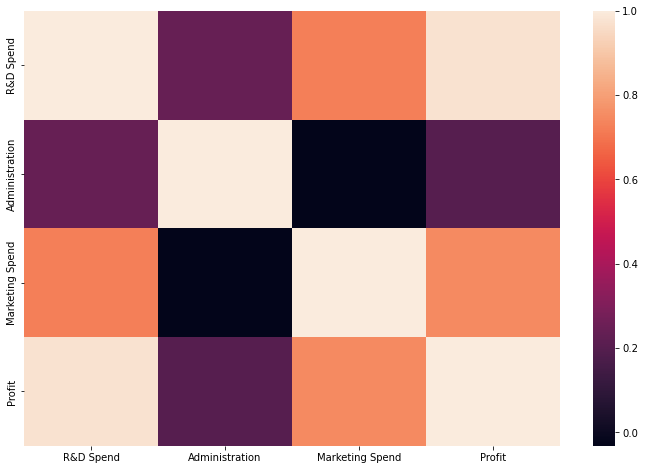

In [10]:
#To see the features behaviour like correlation in features,Noisy values.etc
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [11]:
#To see if duplicates records present in dataset
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [12]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
#Convert the categorical data into numeric form
df['State'] = df['State'].map({'New York':0, 'California':1, 'Florida':2})

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [15]:
#Here we converting our data into one scale form 
#also u can perform MinMaxScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
#StandardScaler function return data into array form

In [16]:
#see here we are converting scaleddata into Dataframe menas array into dataframe
df = pd.DataFrame(scaled_data,columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,-1.206662,2.011203
1,1.955860,1.082807,1.923600,0.024626,1.999430
2,1.754364,-0.728257,1.626528,1.255914,1.980842
3,1.554784,-0.096365,1.422210,-1.206662,1.776627
4,1.504937,-1.079919,1.281528,1.255914,1.357740


In [17]:
#Now our data is ready to make model

In [18]:
#Here we spearate the data from our data set in dependent and independent variable
x = df.iloc[:,:-1] #independent variable or input data

y = df.iloc[:,-1:] #dependant variable or target

In [19]:
#Here we split the data into training and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Linear Regression Algorithm

In [20]:
#Now here we are training model with the help of linear regression algorithm
from sklearn.linear_model import LinearRegression
regre = LinearRegression()
regre.fit(x_train,y_train)

LinearRegression()

In [21]:
#here we predict the model from test data and get the dependent values from model prediction
y_pred = regre.predict(x_test)
y_pred
y_pred.shape

(10, 1)

In [22]:
#see here in y_test our original data 
y_test.shape

(10, 1)

In [23]:
x_train.shape

(40, 4)

In [24]:
y_train.shape

(40, 1)

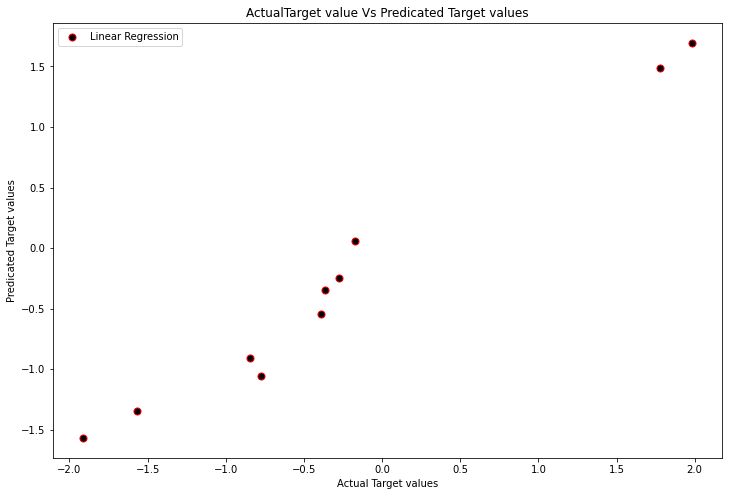

In [25]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,c='k',label='Linear Regression',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [26]:
#Here we check the accuracy of our model and error
from sklearn.metrics import mean_squared_error,r2_score
lin_reg_MSE = mean_squared_error(y_test,y_pred)
print('Linear Regression MSE : ',lin_reg_MSE)

lin_reg_Score = r2_score(y_test,y_pred)
print('Linear Regression R2 score : ',lin_reg_Score)

print('Train Score: ', regre.score(x_train, y_train))  
print('Test Score: ', regre.score(x_test, y_test))

Linear Regression MSE :  0.04973553145431099
Linear Regression R2 score :  0.9650991796290037
Train Score:  0.9424169581402101
Test Score:  0.9650991796290037


# K-Nearest Neighbor Algorithm

In [27]:
#Now here we are training model with the help of K-NN regression algorithm
#first we check the how much neighbors to take train our model by using forloop to give optimal solution or good accuracy
#By using mean square error we see the how much error in the neighbours take min error it will give the good accuracy to our model
from sklearn.neighbors import KNeighborsRegressor
list1 = []
list2 = []
for i in range(3,16,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import mean_squared_error
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    list1.append(mse)
    list2.append(i)
print(list1)
print(list2)
#print(i)

[0.4738962756323456, 0.49722474148786616, 0.46117459033105, 0.5760117037701586, 0.6056891982385765, 0.6673510879886106, 0.6838210968182001]
[3, 5, 7, 9, 11, 13, 15]


In [28]:
#convert k-neighbors and its values in datafram to plot graph
df = pd.DataFrame(list2,columns=['mse'])
df['k_values'] = list1
df

,mse,k_values
0,3,0.473896
1,5,0.497225
2,7,0.461175
3,9,0.576012
4,11,0.605689
5,13,0.667351
6,15,0.683821


<AxesSubplot:xlabel='mse'>

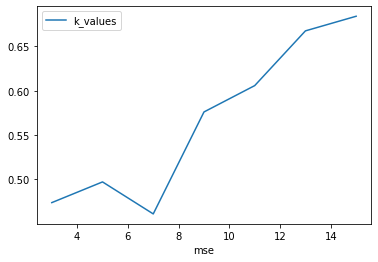

In [29]:
#here we plot the line graph
df.plot(x = 'mse',y='k_values',kind='line')
#sns.lineplot(df['mse'],df['k_values'])

<AxesSubplot:xlabel='mse'>

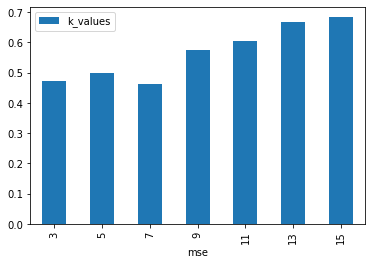

In [30]:
#here in this bar plot it shows 
df.plot(x = 'mse',y='k_values',kind='bar')

In [31]:
#In above bar plot we see the 7 neighbors we will get min error so we take the 7 n_neighbors value to tarin our model
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
knn

KNeighborsRegressor(n_neighbors=7)

In [32]:
#after training of model we will check the accuracy of model by using test data
#here we predict the devependet varaivble by given independent variable pass to our model it will return the predicated values
y_pred_knn = knn.predict(x_test)

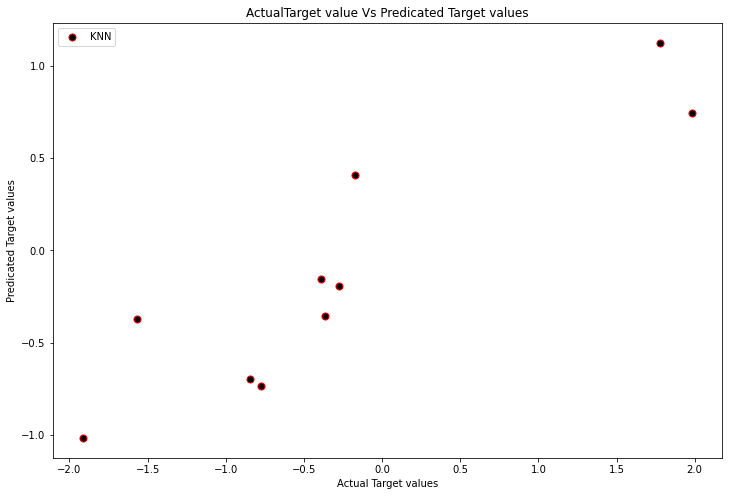

In [33]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [34]:
#Here we check the accuracy of our model and error
knn_MSE = mean_squared_error(y_test,y_pred_knn)
print('KNN MSE : ',knn_MSE)

knn_Score = r2_score(y_test,y_pred)
print('KNN R2 score : ',knn_Score)

print('Train Score: ', knn.score(x_train, y_train))  
print('Test Score: ', knn.score(x_test, y_test))

KNN MSE :  0.46117459033105
KNN R2 score :  0.5201435157504288
Train Score:  0.7979651597066012
Test Score:  0.6763808274252061


# Support Vector Machine (SVM) for Regression 

In [35]:
#Now here we are training model with the help of Support Vector Algorithm
#Here we check the which kernal is best suitable to our dataset and minumum error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
kernel_name = ['linear', 'poly', 'rbf']
Min_mean_squared_error = []
for i in kernel_name:
    cv_reg = SVR(kernel=i)#SVC = support vector classifier
    cv_reg.fit(x_train,y_train)
    y_pred = cv_reg.predict(x_test)
    error = mean_squared_error(y_test,y_pred)
    Min_mean_squared_error.append(error)
Min_mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.05441390900830023, 0.3414007093603183, 0.5244281414413877]

In [36]:
#we create the dataframe to plot barplot
df = pd.DataFrame({'kernal':kernel_name,'Min_mean_squared_error':Min_mean_squared_error})
df

,kernal,Min_mean_squared_error
0,linear,0.054414
1,poly,0.341401
2,rbf,0.524428


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

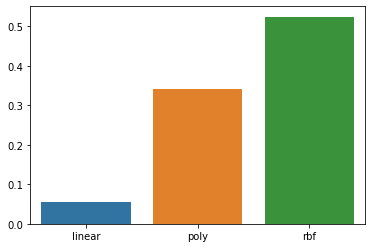

In [37]:
sns.barplot(kernel_name,Min_mean_squared_error)

# plt.bar(kernel_name,Min_mean_squared_error)
# plt.xlabel('Kernal')
# plt.ylabel('Accuracy')

# df.plot(kind='bar')
# plt.xlabel('Kernal')
# plt.ylabel('Accuracy')

In [38]:
#in above graph we see linear kernal is best fit to ur dataset so we use linear kernal
svr_reg = SVR(kernel='linear')
svr_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [39]:
#test the model bu using test data
y_pred_svr = svr_reg.predict(x_test)

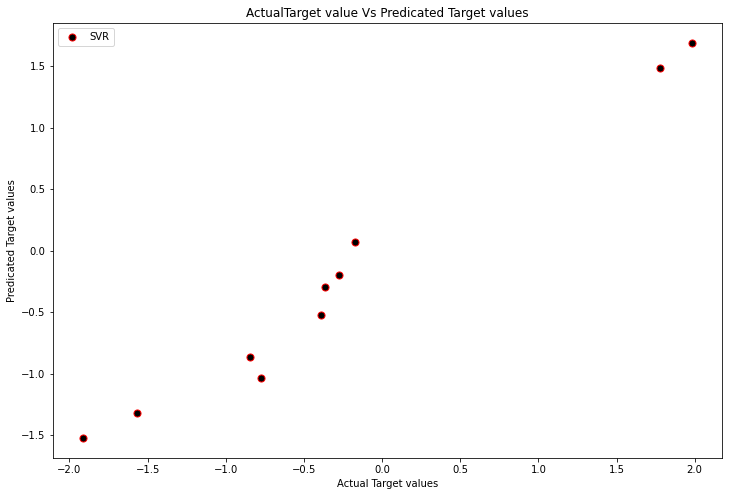

In [40]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_svr,c='k',label='SVR',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [41]:
#Here we check the accuracy of our model and error
SVM_MSE = mean_squared_error(y_test,y_pred_svr)
print('SVM MSE : ',SVM_MSE)

SVM_Score = r2_score(y_test,y_pred_svr)
print('SVM R2 score : ',SVM_Score)

print('Train Score: ', svr_reg.score(x_train, y_train))  
print('Test Score: ', svr_reg.score(x_test, y_test))

SVM MSE :  0.05441390900830023
SVM R2 score :  0.9618162306011147
Train Score:  0.940641984475738
Test Score:  0.9618162306011147


# Decision Tree Algorithm

In [42]:
#Now here we are training model with the help of Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
dt_regression = DecisionTreeRegressor()
dt_regression.fit(x_train,y_train)

DecisionTreeRegressor()

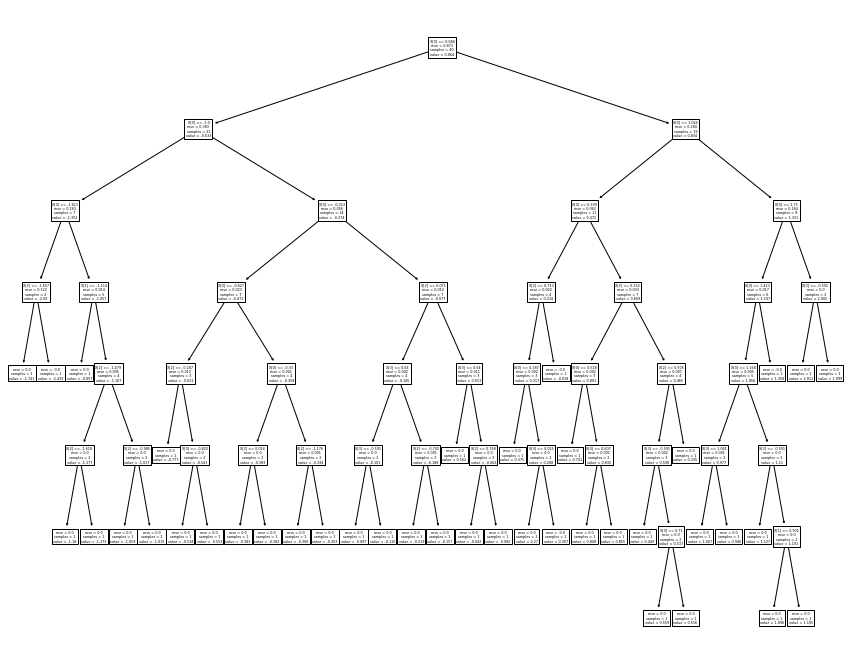

In [43]:
#plotting decision tree of our model
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_regression)

In [44]:
#test the model by using test data
y_pred_DT = dt_regression.predict(x_test)

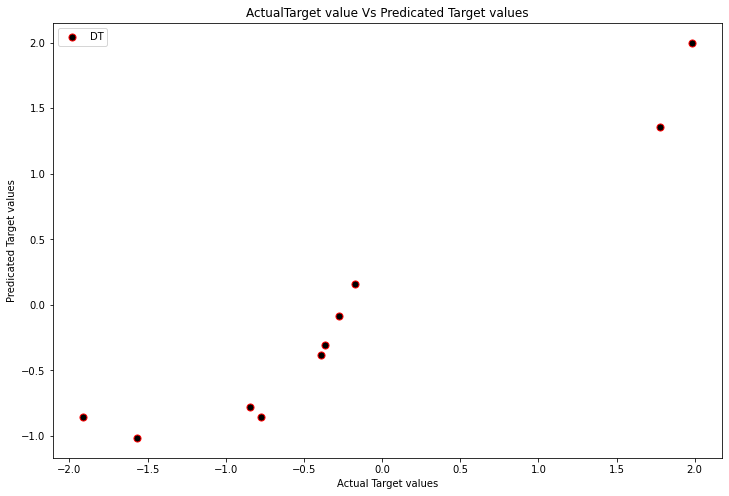

In [45]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_DT,c='k',label='DT',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [46]:
#Here we check the accuracy of our model and error
DT_MSE = mean_squared_error(y_test,y_pred_DT)
print('DT MSE : ',DT_MSE)

DT_Score = r2_score(y_test,y_pred_DT)
print('DT R2 score : ',DT_Score)

print('Train Score: ', dt_regression.score(x_train, y_train))  
print('Test Score: ', dt_regression.score(x_test, y_test))

DT MSE :  0.1760309933362997
DT R2 score :  0.8764741041562608
Train Score:  1.0
Test Score:  0.8764741041562608


# Random Forest Algorithm

In [47]:
#Now here we are training model with the help of Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
RFARegree = RandomForestRegressor(n_estimators=60) #n_estimators less error maximum and more error less
RFARegree.fit(x_train,y_train)

C:\Users\vbkat\AppData\Local\Temp/ipykernel_12080/518917126.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFARegree.fit(x_train,y_train)


RandomForestRegressor(n_estimators=60)

In [48]:
#test the model by using test data
y_pred_RF = RFARegree.predict(x_test)

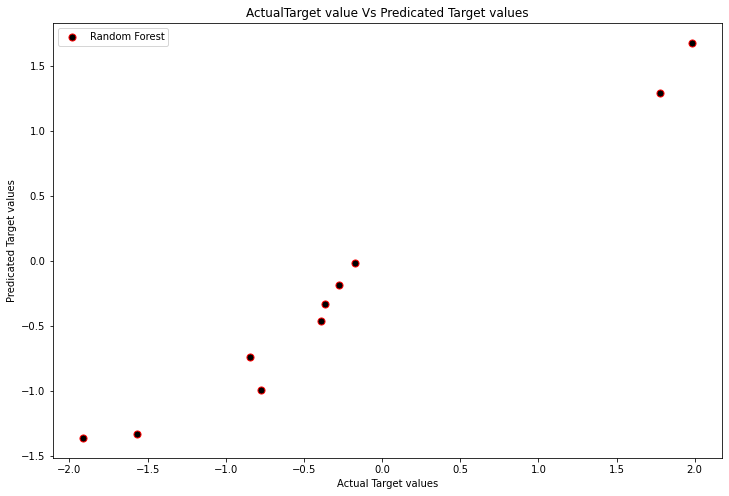

In [49]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred_RF,c='k',label='Random Forest',s=50,edgecolor='r')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

In [50]:
#Here we check the accuracy of our model and error
RF_MSE = mean_squared_error(y_test,y_pred_RF)
print('RF MSE : ',RF_MSE)

RF_Score = r2_score(y_test,y_pred_RF)
print('RF R2 score : ',RF_Score)

print('Train Score: ', RFARegree.score(x_train, y_train))  
print('Test Score: ', RFARegree.score(x_test, y_test))

RF MSE :  0.0783539373457178
RF R2 score :  0.9450168398185246
Train Score:  0.9898546475563867
Test Score:  0.9450168398185246


# All Regression Type algorithm result

In [51]:
#Here we check the accuracy of our model and error
from sklearn.metrics import mean_squared_error,r2_score
lin_reg_MSE = mean_squared_error(y_test,y_pred)
print('Linear Regression MSE : ',lin_reg_MSE)
lin_reg_Score = r2_score(y_test,y_pred)
print('Linear Regression R2 score : ',lin_reg_Score)
LR_train = regre.score(x_train, y_train)
LR_test = regre.score(x_test, y_test)
print('Train Score: ', LR_train)  
print('Test Score: ', LR_test)
print('\n')

#Here we check the accuracy of our model and error
knn_MSE = mean_squared_error(y_test,y_pred_knn)
print('KNN MSE : ',knn_MSE)
knn_Score = r2_score(y_test,y_pred_knn)
print('KNN R2 score : ',knn_Score)
KNN_train = knn.score(x_train, y_train)
KNN_test = knn.score(x_test, y_test)
print('Train Score: ', KNN_train)  
print('Test Score: ', KNN_test)
print('\n')

#Here we check the accuracy of our model and error
SVM_MSE = mean_squared_error(y_test,y_pred_svr)
print('SVM MSE : ',SVM_MSE)
SVM_Score = r2_score(y_test,y_pred_svr)
print('SVM R2 score : ',SVM_Score)
SVM_train = svr_reg.score(x_train, y_train)
SVM_test = svr_reg.score(x_test, y_test)
print('Train Score: ', SVM_train)  
print('Test Score: ', SVM_test)
print('\n')

#Here we check the accuracy of our model and error
DT_MSE = mean_squared_error(y_test,y_pred_DT)
print('DT MSE : ',DT_MSE)
DT_Score = r2_score(y_test,y_pred_DT)
print('DT R2 score : ',DT_Score)
DT_train = dt_regression.score(x_train, y_train)
DT_test = dt_regression.score(x_test, y_test)
print('Train Score: ', DT_train)  
print('Test Score: ', DT_test)
print('\n')

#Here we check the accuracy of our model and error
RF_MSE = mean_squared_error(y_test,y_pred_RF)
print('RF MSE : ',RF_MSE)
RF_Score = r2_score(y_test,y_pred_RF)
print('RF R2 score : ',RF_Score)
RF_train = RFARegree.score(x_train, y_train)
RF_test = RFARegree.score(x_test, y_test)
print('Train Score: ', RF_train)  
print('Test Score: ', RF_test)

Linear Regression MSE :  0.5244281414413877
Linear Regression R2 score :  0.6319940327016489
Train Score:  0.9424169581402101
Test Score:  0.9650991796290037


KNN MSE :  0.46117459033105
KNN R2 score :  0.6763808274252061
Train Score:  0.7979651597066012
Test Score:  0.6763808274252061


SVM MSE :  0.05441390900830023
SVM R2 score :  0.9618162306011147
Train Score:  0.940641984475738
Test Score:  0.9618162306011147


DT MSE :  0.1760309933362997
DT R2 score :  0.8764741041562608
Train Score:  1.0
Test Score:  0.8764741041562608


RF MSE :  0.0783539373457178
RF R2 score :  0.9450168398185246
Train Score:  0.9898546475563867
Test Score:  0.9450168398185246


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


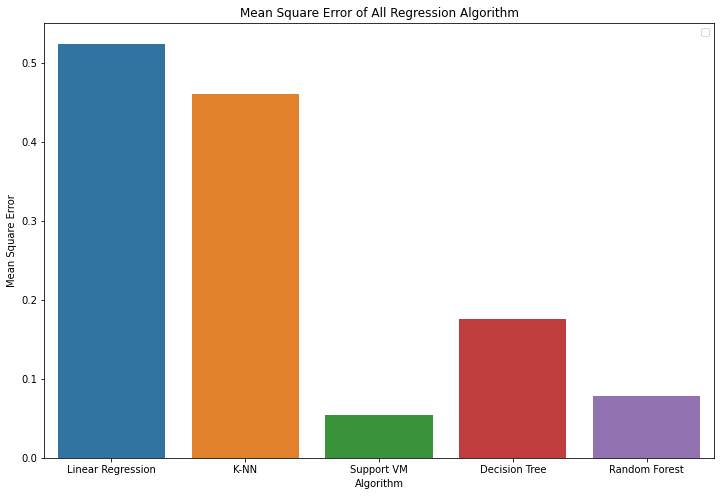

In [52]:
#Here we take minimum error it will give us more accuracy of our model
#plot says Support Vector Machine Algorithm is best to our dataset or model
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
Mean_Sq_Error = [lin_reg_MSE,knn_MSE,SVM_MSE,DT_MSE,RF_MSE]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,Mean_Sq_Error)
plt.xlabel('Algorithm')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of All Regression Algorithm')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


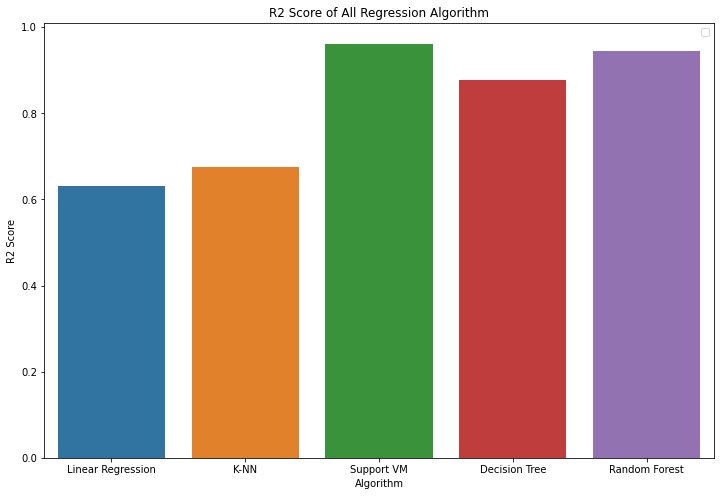

In [53]:
#here in r2 score we take maximum value or nearby 1 it means our model working good on SVR algorithm
#barplot says Support Vector Machine Algorithm gives good score we can go with SVM to make model
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
R2_Score = [lin_reg_Score,knn_Score,SVM_Score,DT_Score,RF_Score]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('R2 Score of All Regression Algorithm')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


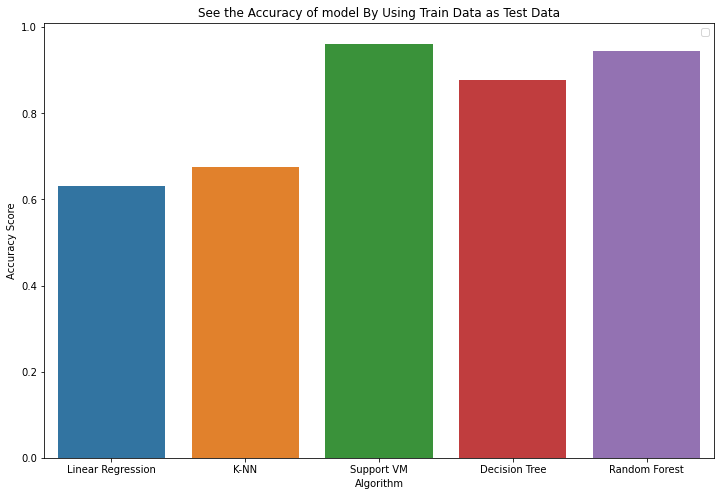

In [54]:
#In this plot we see the how model perofrm on traning data set passed by as test data
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
train_data_as_test_data = [LR_train,KNN_train,SVM_train,DT_train,RF_train]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('See the Accuracy of model By Using Train Data as Test Data')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


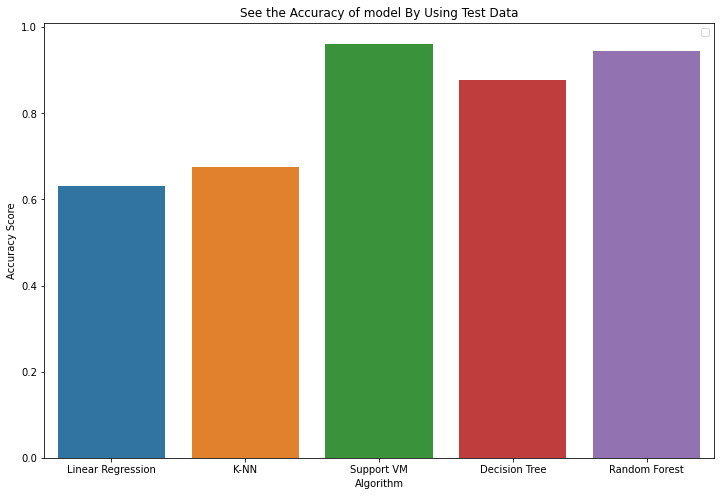

In [55]:
#Here in this plot we see how model perfomrm on test data
Algorithm = ['Linear Regression','K-NN','Support VM','Decision Tree','Random Forest']
test_data_as_test_data = [LR_test,KNN_test,SVM_test,DT_test,RF_test]
plt.figure(figsize=(12,8))
sns.barplot(Algorithm,R2_Score)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('See the Accuracy of model By Using Test Data')
plt.legend()

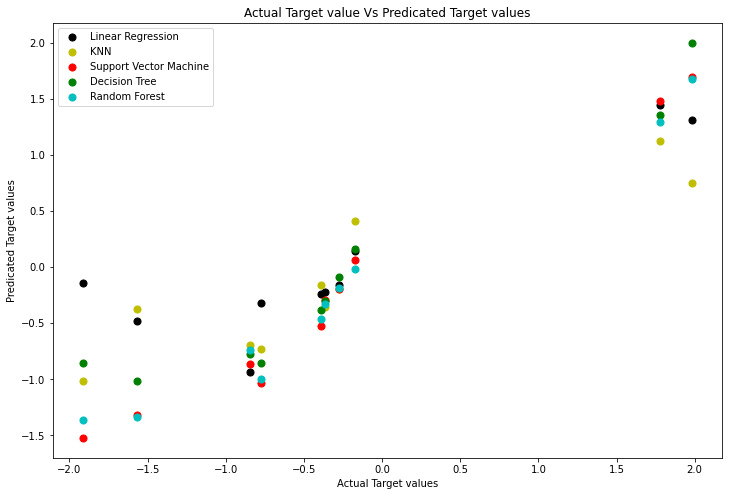

In [56]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,c='k',label='Linear Regression',s=50)
plt.scatter(y_test,y_pred_knn,c='y',label='KNN',s=50)
plt.scatter(y_test,y_pred_svr,c='r',label='Support Vector Machine',s=50)
plt.scatter(y_test,y_pred_DT,c='g',label='Decision Tree',s=50)
plt.scatter(y_test,y_pred_RF,c='c',label='Random Forest',s=50)
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('Actual Target value Vs Predicated Target values')
plt.legend()
plt.show()

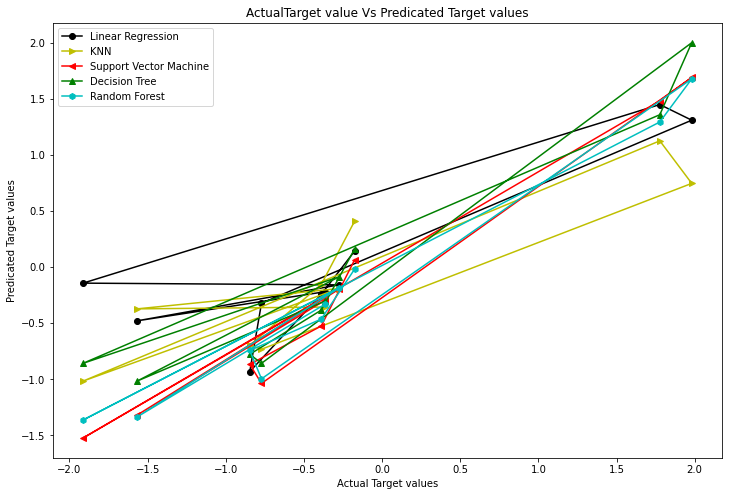

In [57]:
#visuallization of given target and predicated target variable
plt.figure(figsize=(12,8))
plt.plot(y_test,y_pred,c='k',label='Linear Regression',marker='o')
plt.plot(y_test,y_pred_knn,c='y',label='KNN',marker='>')
plt.plot(y_test,y_pred_svr,c='r',label='Support Vector Machine',marker='<')
plt.plot(y_test,y_pred_DT,c='g',label='Decision Tree',marker='^')
plt.plot(y_test,y_pred_RF,c='c',label='Random Forest',marker='h')
plt.xlabel('Actual Target values')
plt.ylabel('Predicated Target values')
plt.title('ActualTarget value Vs Predicated Target values')
plt.legend()
plt.show()

# Ridge and Lasso

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor  = GridSearchCV(ridge,paramters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso  = Lasso()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,paramters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.062470663382963795
{'alpha': 0.01}
-0.06066798708015728
